<div style="background-color: #add8e6; padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 20px;">
        Mohammad Idrees Bhat <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Tech Skills Trainer | AI/ML Consultant</span> <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
    </div>
</div>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
   Supervised Learning Algorithms comparisons <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;"></h3>
</div>

### Applying linear regression and decision trees and comparing performance

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Automobile_data.csv')  # Update with your actual file path


In [16]:
# Check for non-numeric values and convert to NaN
data.replace('?', float('nan'), inplace=True)  # Replace '?' with NaN

# Check for NaN values
print("Missing values in each column before dropping:")
print(data.isnull().sum())

# Drop rows with any missing values
data.dropna(inplace=True)

# Check for NaN values after dropping
print("Missing values in each column after dropping:")
print(data.isnull().sum())

# Convert relevant columns to numeric types
data['engine-size'] = pd.to_numeric(data['engine-size'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

Missing values in each column before dropping:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
Missing values in each column after dropping:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width            

In [17]:
# After conversion, drop any remaining NaN values again
data.dropna(subset=['engine-size', 'price'], inplace=True)

In [18]:
# Define the features (X) and target variable (y)
X = data[['engine-size']]  # Using "engine-size" as an example feature
y = data['price']          # Target variable we want to predict


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and train the Linear Regression model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R² score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.3727634278930363
Mean Squared Error: 11161442.752513453


This MSE indicates that, on average, the squared differences between predicted prices and actual prices are quite large.

R² score of 0.3728 means that approximately 37.28% of the variability in house prices can be explained by the engine size in your model.
This score suggests a moderate fit. While it shows that there is some relationship between engine size and price, a significant portion (around 62.72%) of the variability in prices remains unexplained by this model. In practical terms, this could mean that other factors (like brand, age of the car, mileage, etc.) are also significantly influencing the price but are not included in the model.

c:\Users\devid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


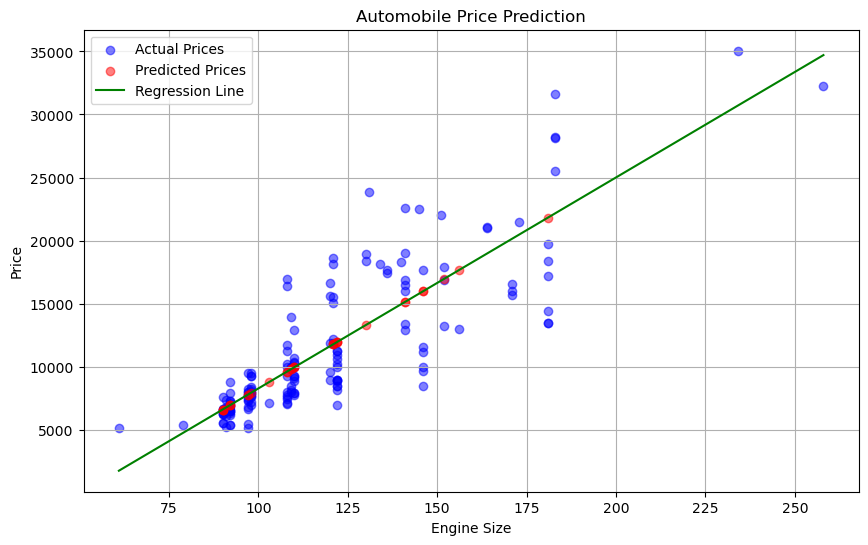

In [24]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Prices', alpha=0.5)

# Line plot of the predictions
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', alpha=0.5)

# Plotting the regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(x_range, model.predict(x_range), color='green', label='Regression Line')

# Labels and title
plt.title('Automobile Price Prediction')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## **Decision Tree**

In [25]:


from sklearn.tree import DecisionTreeRegressor


# Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [27]:
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print("R² Score:", dt_r2)
print("Mean Squared Error:", dt_mse)

R² Score: 0.6375782655280515
Mean Squared Error: 6449160.685875086


The R² Score of 0.638 indicates that approximately 63.8% of the variance in the automobile prices can be explained by the model, which is an **improvement** over a lower score, suggesting better predictive capability. 

The Mean Squared Error (MSE) of reflects the average squared difference between predicted and actual prices; **lower MSE** is preferred, indicating the **predictions are closer to actual values**. 

Overall, both metrics suggest that the model has improved, providing a better fit to the data compared to previous iterations.

c:\Users\devid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


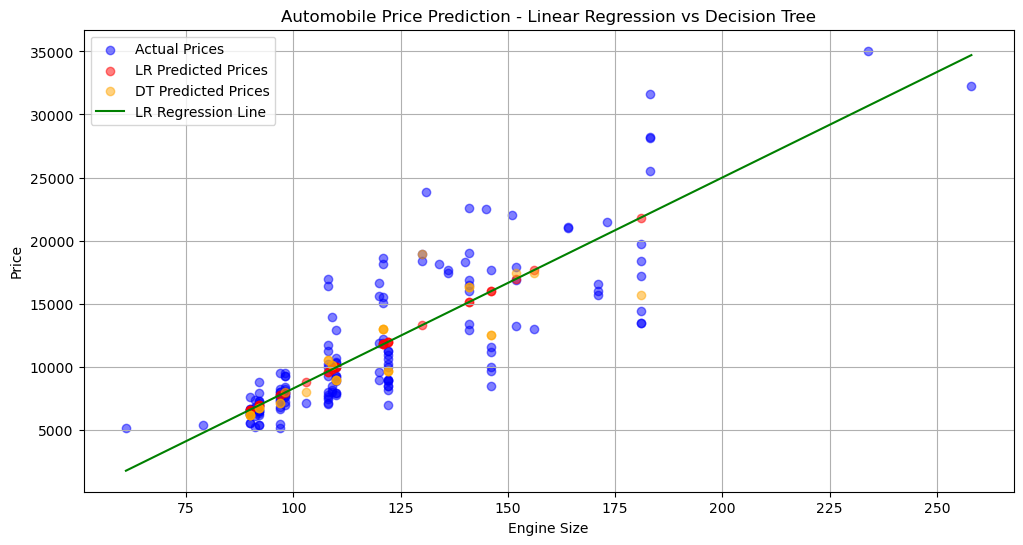

In [30]:
# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Prices', alpha=0.5)

# Plot Linear Regression predictions
plt.scatter(X_test, y_pred, color='red', label='LR Predicted Prices', alpha=0.5)

# Plot Decision Tree predictions
plt.scatter(X_test, y_pred_dt, color='orange', label='DT Predicted Prices', alpha=0.5)

# Plotting the regression line for Linear Regression
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(x_range, model.predict(x_range), color='green', label='LR Regression Line')


# Add legend, labels, and title
plt.title('Automobile Price Prediction - Linear Regression vs Decision Tree')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## **Lasso, Ridge, XGBoost and Polynomial Regression**

Instead of having to write things over and over again, let's use a function to Evaluate Models:

In [31]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"R² Score: {r2}")
    print(f"Mean Squared Error: {mse}")


In [34]:
print("Lasso Regression:")
lasso_model = Lasso(alpha=1.0)
evaluate_model(lasso_model, X_train, y_train, X_test, y_test)


Lasso Regression:
R² Score: 0.37276586463755124
Mean Squared Error: 11161399.391546292


It did not RUN? Did you import the Lasso class from `sklearn.linear_model` module.

In [33]:
from sklearn.linear_model import Lasso

Make sure to import the correct classes beforehand

In [36]:
from sklearn.linear_model import Ridge

print("\nRidge Regression:")
ridge_model = Ridge(alpha=1.0)
evaluate_model(ridge_model, X_train, y_train, X_test, y_test)



Ridge Regression:
R² Score: 0.372766637001267
Mean Squared Error: 11161385.647619708


In [37]:
import xgboost as xgb

print("\nXGBoost Regression:")
xgb_model = xgb.XGBRegressor()
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)



XGBoost Regression:
R² Score: 0.6375686583844172
Mean Squared Error: 6449331.641441867


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

print("\nPolynomial Regression:")
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = Lasso(alpha=1.0)  
evaluate_model(poly_model, X_poly_train, y_train, X_poly_test, y_test)



Polynomial Regression:
R² Score: 0.3705960454189233
Mean Squared Error: 11200010.521810375


A lower MSE is preferable, indicating better predictive performance. 
Here, the XGBoost model has a slightly lower MSE than the Decision Tree model, suggesting it made slightly more accurate predictions overall

Why Did Other Models Perform Poorly?

Lasso and Ridge Regression: These models often perform better when there is a strong linear relationship between the features and the target variable. If the relationship is non-linear, they might underperform compared to models like Decision Trees or XGBoost, which can capture more complex patterns.

Polynomial Regression: If the degree of the polynomial is not chosen appropriately, it can lead to overfitting or underfitting. It may also introduce unnecessary complexity in cases where the underlying relationship isn't polynomial.

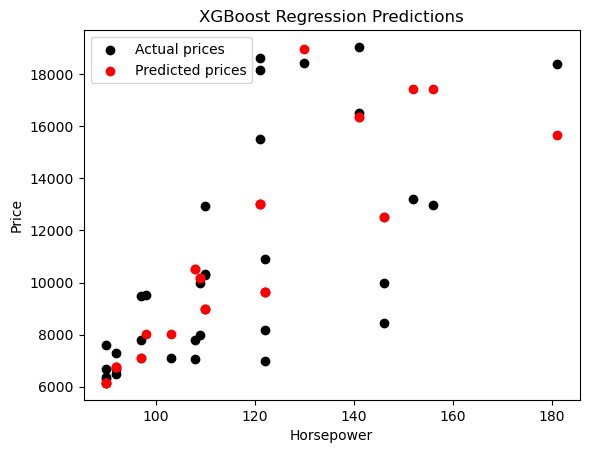

In [39]:


# Optional Visualization
# Visualize predictions for the XGBoost model
plt.scatter(X_test, y_test, color='black', label='Actual prices')
plt.scatter(X_test, xgb_model.predict(X_test), color='red', label='Predicted prices')
plt.title('XGBoost Regression Predictions')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend()
plt.show()

c:\Users\devid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


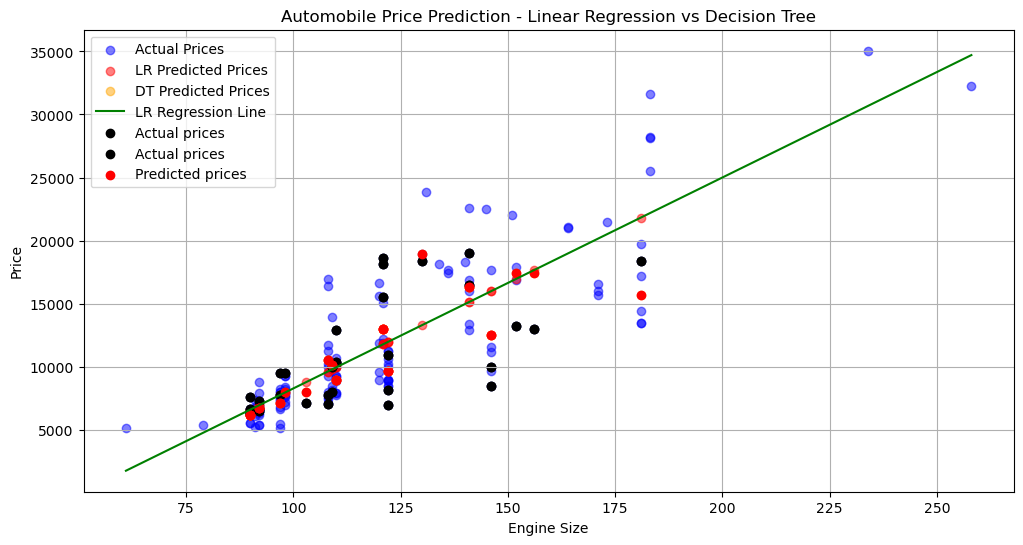

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Prices', alpha=0.5)

# Plot Linear Regression predictions
plt.scatter(X_test, y_pred, color='red', label='LR Predicted Prices', alpha=0.5)

# Plot Decision Tree predictions
plt.scatter(X_test, y_pred_dt, color='orange', label='DT Predicted Prices', alpha=0.5)

# Plotting the regression line for Linear Regression
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(x_range, model.predict(x_range), color='green', label='LR Regression Line')


#plt.scatter(X_test, y_test, color='black', label='Actual prices')

plt.scatter(X_test, xgb_model.predict(X_test), color='red', label='Predicted prices')

# Add legend, labels, and title
plt.title('Automobile Price Prediction - Linear Regression vs Decision Tree')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Another optional Visualisation

c:\Users\devid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


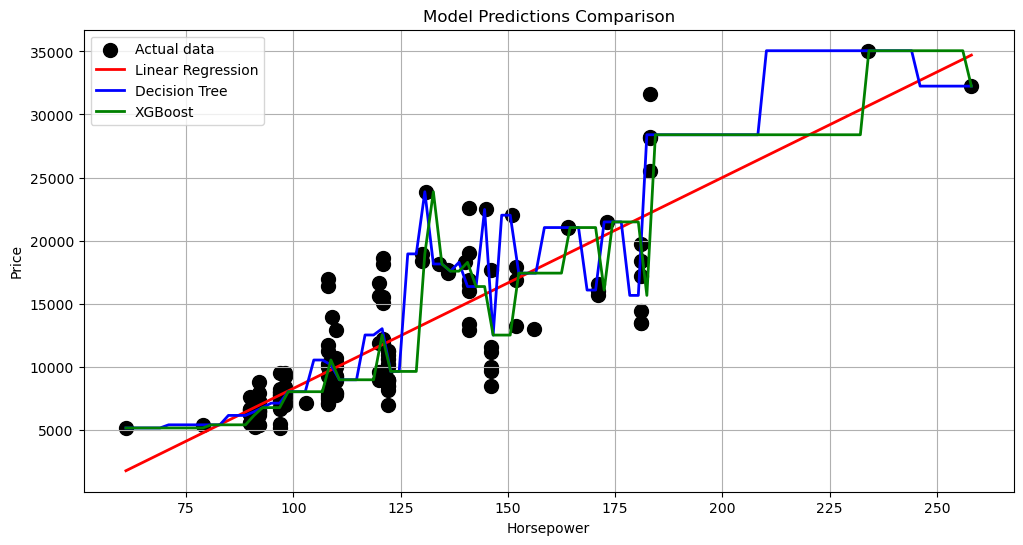

In [44]:
# Generate input values for plotting predictions
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict using each model
y_linear_pred = model.predict(X_plot)
y_tree_pred = dt_model.predict(X_plot)
y_xgb_pred = xgb_model.predict(X_plot)


# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', label='Actual data', s=100)  # Actual data points
plt.plot(X_plot, y_linear_pred, color='red', label='Linear Regression', linewidth=2)
plt.plot(X_plot, y_tree_pred, color='blue', label='Decision Tree', linewidth=2)
plt.plot(X_plot, y_xgb_pred, color='green', label='XGBoost', linewidth=2)
plt.title('Model Predictions Comparison')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Linear Regression:Straight Line, assumes a linear relationship between input and output, resulting in a simple straight line.

Decision tree: Splits the data into distinct regions, leading to piecewise constant predictions. This captures non-linear relationships but can overfit the data.

XGBoost: An ensemble method that combines multiple decision trees, resulting in a smooth but non-linear prediction line. It captures intricate patterns better than a single decision tree. 
Ensemble methods combine multiple models to produce better predictions than any individual model could achieve alone. 

- https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda

<h2 style="background-color: #ffe4e1; color: #2f4f4f; padding: 10px; border-radius: 10px; width: 350px; text-align: center; float: right; margin: 20px 0;">
    Mohammad Idrees Bhat<br>
    <span style="font-size: 12px; color: #696969;">
        Tech Skills Trainer | AI/ML Consultant
    </span>
</h2>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->